# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - X - \epsilon)^2 = \mathbb{E}(X(a-1) - \epsilon)^2 $,
$$= \mathbb{E}(X^2(a-1)^2-2X(a-1)\epsilon+\epsilon^2)= \mathbb{E}(X^2(a-1))- 2\mathbb{E}(X(a-1)\epsilon) + \mathbb{E}(\epsilon^2)$$
$$= (a-1)^2 + \sigma^2$$
In our task we know $a^* = 1$.

In [1]:
def population_risk(a, sigma_eps):
     return (a-1)**2+sigma_eps**2

### b)

In [2]:
# sampling
import numpy as np
def generate_data(n, sigma_eps):
     noise = np.random.normal(0, sigma_eps, size=n)
     x = np.random.normal(0, 1, size=n)
     y = noise + x
     return x, y
x, y = generate_data(50, 1)


Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [3]:
def empirical_risk(a, x, y):
     return np.mean(np.power(a*x-y, 2))

### c)
argmin of population risk - a=1
min of population risk - $R(a,a^*)= sigma_{eps}^2$

argmin of empirical risk = 


/tmp/ipykernel_53525/519141351.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(1, 1, 'ro', c="red", label="Population risk minimum")
/tmp/ipykernel_53525/519141351.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(a_hat, empirical_risk(1, x, y), 'ro', c="green", label="Minimum empirical risk")
/tmp/ipykernel_53525/519141351.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(a_hat, population_risk(a_hat, 1), 'ro', c='yellow', label="ERM estimator ( population risk at empirical risk minimum")


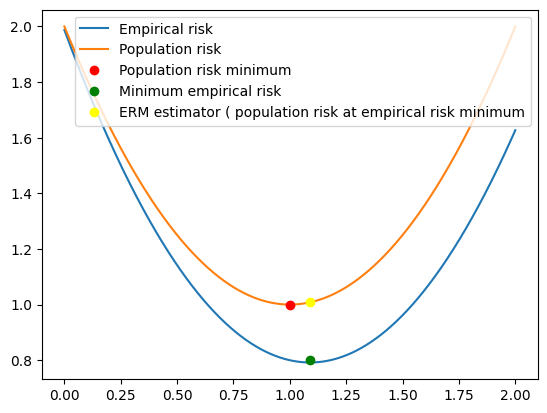

In [18]:
# code, plot

a = np.linspace(0, 2, 1000)
er = np.array([empirical_risk(i, x, y) for i in a])
pr = np.array([population_risk(i, 1) for i in a])


import matplotlib.pyplot as plt
from scipy.optimize import minimize
# argmin of empirical risk
min_res = minimize(empirical_risk, np.array([0]), args=(x,y))
a_hat = min_res.x

fig, ax = plt.subplots()
ax.plot(a, er, '', label="Empirical risk")
ax.plot(a, pr, '', label="Population risk")
ax.plot(1, 1, 'ro', c="red", label="Population risk minimum")
ax.plot(a_hat, empirical_risk(1, x, y), 'ro', c="green", label="Minimum empirical risk")
ax.plot(a_hat, population_risk(a_hat, 1), 'ro', c='yellow', label="ERM estimator ( population risk at empirical risk minimum")
plt.legend()
plt.show()

In [5]:
population_risk(1, 1)

1

In [6]:
empirical_risk(1, x, y)

1.2090167619913585

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [7]:
# excess risk
population_risk(a_hat, 1) - 1

array([0.02520091])

In [8]:
# simulations with fixed sample size

In [9]:
# excess risk

excess_risks = []
for i in range(200):
     x, y = generate_data(50, 1)
     a_hat = minimize(empirical_risk, np.array([0]), args=(x,y)).x
     excess_risks.append(population_risk(a_hat, 1)-1)
np.mean(excess_risks)

0.02255580951845271

In [10]:
# simulations for various sample sizes

In [11]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)

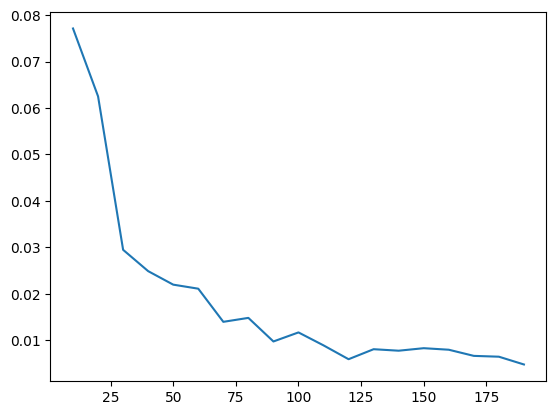

In [12]:
excess_risk_means = []
for i in range(10, 200, 10):
     excess_risks = []
     for _ in range(100):
          x, y = generate_data(i, 1)
          a_hat = minimize(empirical_risk, np.array([0]), args=(x,y)).x
          excess_risks.append(population_risk(a_hat, 1)-1)
     excess_risk_means.append(np.mean(excess_risks))

fig, ax = plt.subplots()
ax.plot(list(range(10, 200,10)), excess_risk_means, '')